In [6]:
library (tidyverse)
library (tidymodels) 
library(repr)
options(repr.matrix.max.rows = 6)
source("cleanup.R")

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'cleanup.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [7]:
players <- read_csv ("players.csv") 
players 
sessions <- read_csv ("sessions.csv")
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [13]:
players_data <- players |> 
    mutate (experience = as_factor (experience) , gender = as_factor (gender) )
players_data

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [14]:
most_played_group <- players |> 
    group_by ( experience ) |> 
    summarise ( avg_played_hours = mean (played_hours) ) 
most_played_group
#Regular players played the most 

experience,avg_played_hours
<chr>,<dbl>
Amateur,6.0174603
Beginner,1.2485714
Pro,2.6000000
Regular,18.2083333
Veteran,0.6479167


In [16]:
numbers_group <- players |> 
    group_by (experience) |> 
    summarise (count = n() ) 
numbers_group
#Imbalance in the types of players 

experience,count
<chr>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


In [18]:
subscription_by_group_pct <- players |> 
    group_by (experience, subscribe) |> 
    summarise (count = n() ) 
subscription_by_group_pct

`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


experience,subscribe,count
<chr>,<lgl>,<int>
Amateur,FALSE,18
Amateur,TRUE,45
Beginner,FALSE,8
⋮,⋮,⋮
Regular,TRUE,29
Veteran,FALSE,15
Veteran,TRUE,33


In [19]:
subscription_pct <- players |> 
    group_by (subscribe) |> 
    summarise (count = n() ) 
subscription_pct

subscribe,count
<lgl>,<int>
FALSE,52
TRUE,144


`summarise()` has grouped output by 'gender'. You can override using the
`.groups` argument.


gender,subscribe,avg_played_hours
<fct>,<lgl>,<dbl>
Non-binary,TRUE,20.04545
Female,TRUE,13.45172
Agender,TRUE,6.25000
⋮,⋮,⋮
Other,TRUE,0.200
Two-Spirited,TRUE,0.125
Two-Spirited,FALSE,0.000


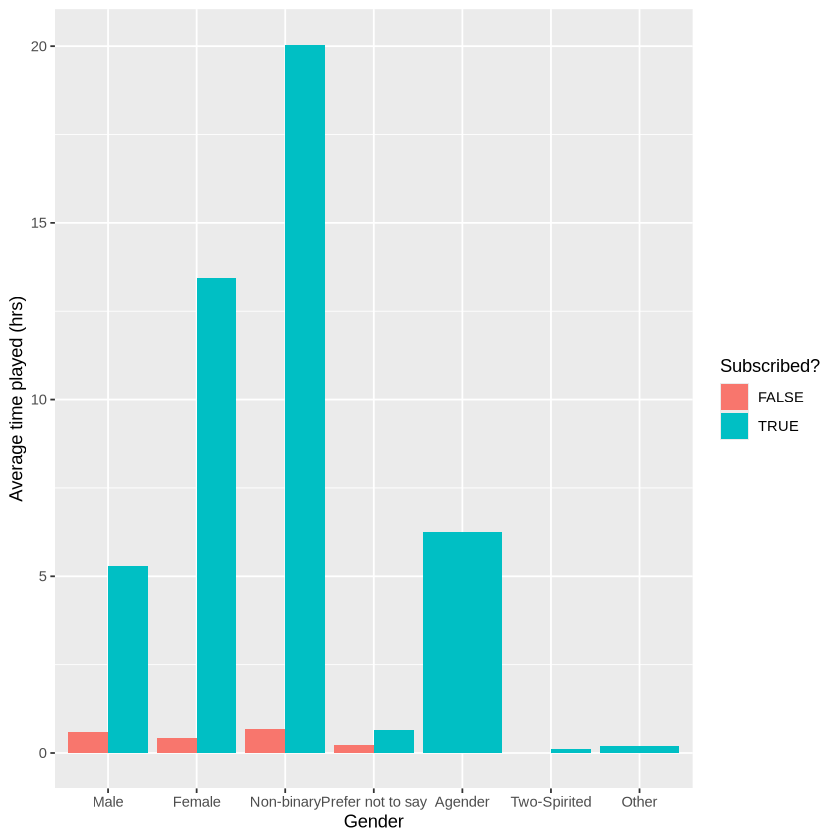

In [43]:
gender_time <- players_data |> 
    group_by (gender,subscribe) |> 
    summarise (avg_played_hours = mean (played_hours) ) |> 
    arrange (desc(avg_played_hours) ) 
gender_time
#non-binary ppl had the highest avg playing hours 
gender_time_plot <- ggplot ( gender_time, aes ( x = gender , y = avg_played_hours, fill = subscribe) ) +
    geom_bar (stat = "identity", position = "dodge" ) +
    labs ( x = "Gender" , y = "Average time played (hrs)", fill = "Subscribed?" ) 
gender_time_plot

# Subcribed players tend to have higher playing times! 